In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/Users/serhattekin/Downloads/cs210/combined_data.csv')

In [6]:
data.head()

,Track Album Name,Track Name,Artist Name,Track Popularity,Date Added
0,american dream,pop ur shit,21 Savage,83,2024-01-18 19:39:13+00:00
1,american dream,all of me,21 Savage,85,2024-01-18 19:39:11+00:00
2,american dream,american dream,21 Savage,80,2024-01-18 19:39:09+00:00
3,"Bütüneserleri, Vol. 4 (Nazim Türküsü)",Karlı Kayın Ormanı,Zülfü Livaneli,46,2024-01-15 14:14:49+00:00
4,american dream,redrum,21 Savage,88,2024-01-14 14:01:09+00:00


In [8]:
data2 = pd.read_csv('/Users/serhattekin/Downloads/cs210/combined_data2.csv')

In [9]:
data2.head()

,Track Album Name,Track Name,Artist Name,Track Popularity,Date Added
0,lovely (with Khalid),lovely (with Khalid),Billie Eilish,91,2020-12-12 21:28:27+00:00
1,Word To LA,War Scars,Booka600,25,2020-12-12 21:28:26+00:00
2,Rich And Blind,Rich And Blind,Juice WRLD,65,2020-12-12 21:28:26+00:00
3,Love Songs 4 The Streets 2,Bora Bora,Lil Durk,60,2020-12-12 21:28:25+00:00
4,All The Little Lights,Let Her Go,Passenger,76,2020-12-12 21:28:25+00:00


In [10]:
combined_data = pd.concat([data, data2])
combined_data.describe()

,Track Popularity
count,783.000000
mean,65.234994
std,15.943104
min,0.000000
25%,56.000000
50%,67.000000
75%,77.000000
max,95.000000


In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 282
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track Album Name  783 non-null    object
 1   Track Name        783 non-null    object
 2   Artist Name       733 non-null    object
 3   Track Popularity  783 non-null    int64 
 4   Date Added        783 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.7+ KB


/var/folders/5d/jzwx1gts0vb4mmfms4j_6v740000gn/T/ipykernel_58093/2386924631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


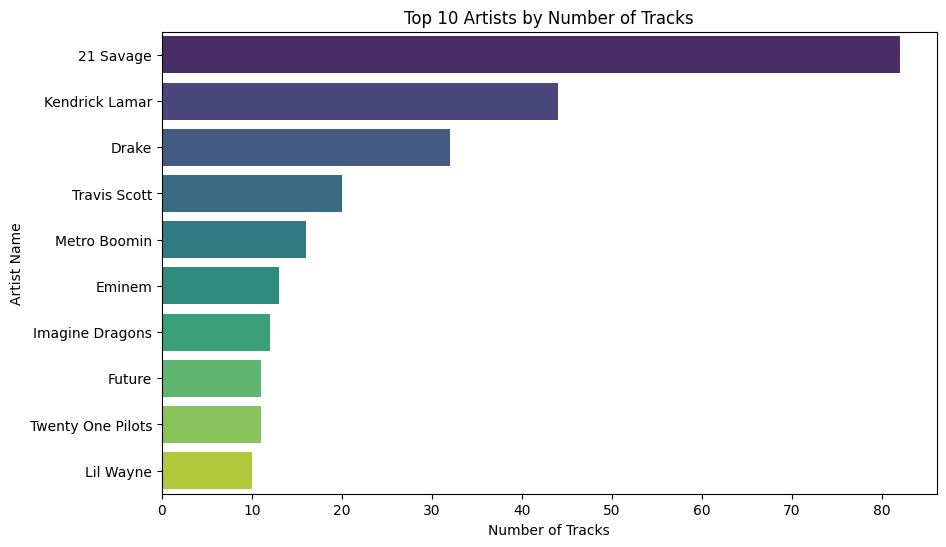

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Artists
top_artists = combined_data.groupby('Artist Name')['Track Name'].count().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()


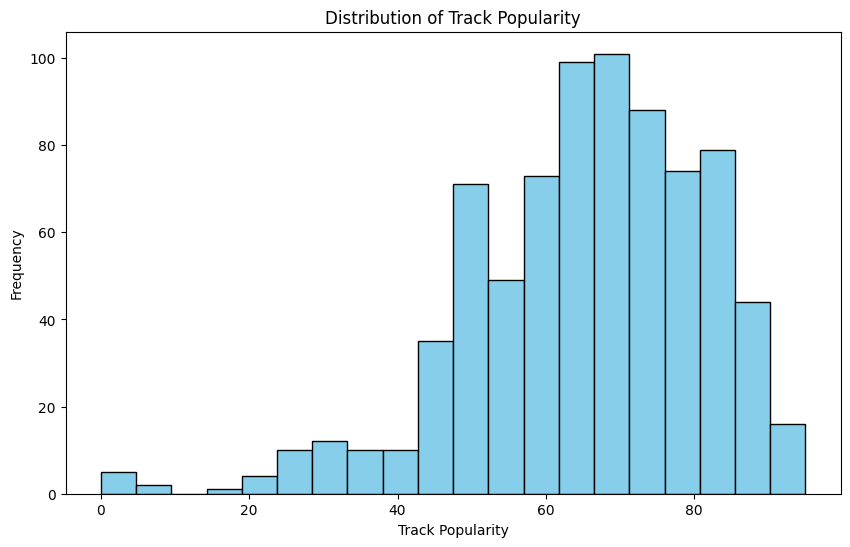

In [14]:
popularity_data = combined_data['Track Popularity']

# Plotting a Histogram
plt.figure(figsize=(10, 6))
plt.hist(popularity_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

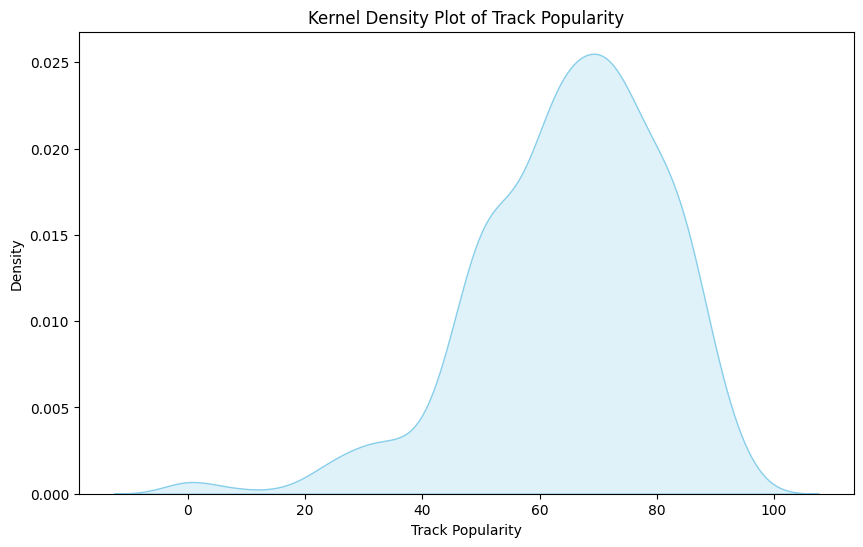

In [15]:
popularity_data = combined_data['Track Popularity']

plt.figure(figsize=(10, 6))
sns.kdeplot(popularity_data, fill=True, color='skyblue')
plt.title('Kernel Density Plot of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Density')
plt.show()

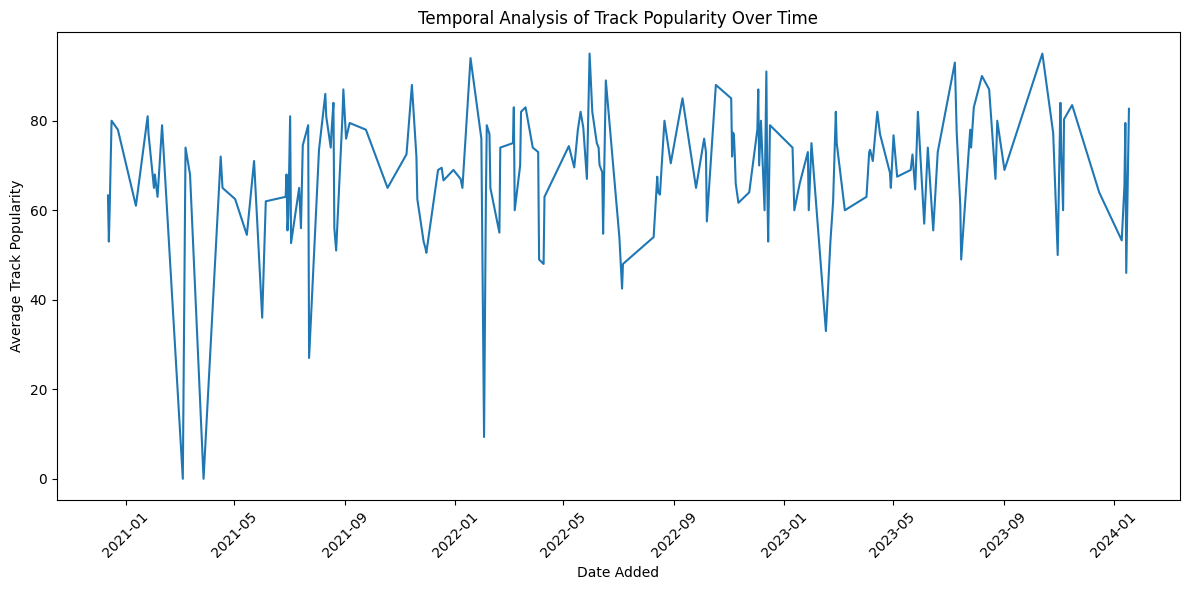

In [16]:
combined_data['Date Added'] = pd.to_datetime(combined_data['Date Added'])

# Group by the date added and calculate the mean popularity for each date
popularity_over_time = combined_data.groupby(combined_data['Date Added'].dt.date)['Track Popularity'].mean().reset_index()

# Plotting the temporal analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date Added', y='Track Popularity', data=popularity_over_time)
plt.title('Temporal Analysis of Track Popularity Over Time')
plt.xlabel('Date Added')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

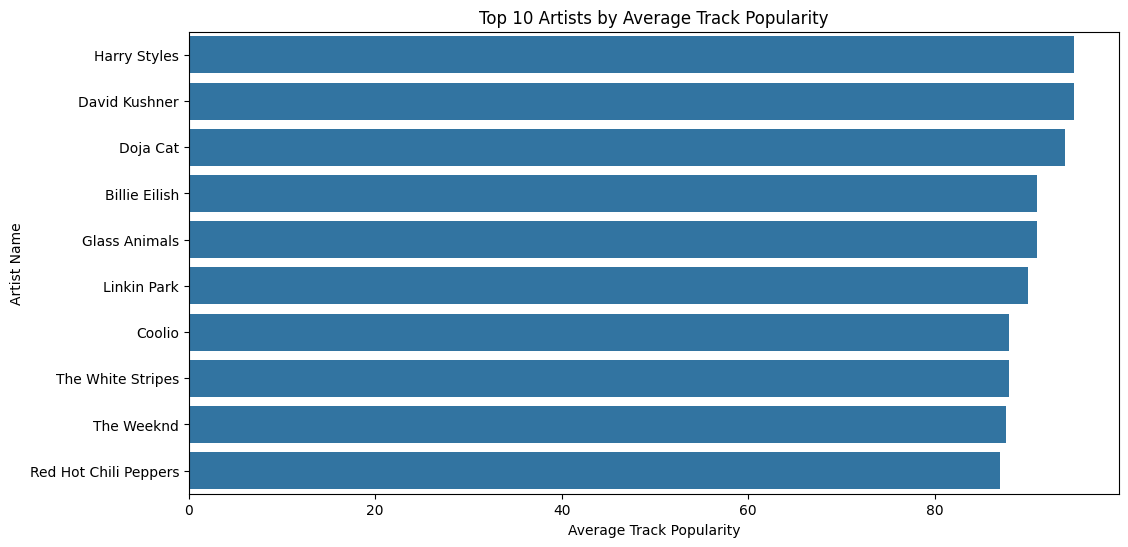

In [18]:
artist_popularity = combined_data.groupby('Artist Name')['Track Popularity'].mean().sort_values(ascending=False).reset_index()

# Plotting the Artist Popularity
plt.figure(figsize=(12, 6))
sns.barplot(x='Track Popularity', y='Artist Name', data=artist_popularity.head(10))
plt.title('Top 10 Artists by Average Track Popularity')
plt.xlabel('Average Track Popularity')
plt.ylabel('Artist Name')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df is your dataframe with the relevant columns

# Feature selection (you can include/exclude features based on importance)
features = ['Date Added_numeric']

# Target variable
target = 'Track Popularity'

# Convert date added to a numeric format (for linear regression)
combined_data['Date Added_numeric'] = pd.to_numeric(combined_data['Date Added'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(combined_data, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression
])

# Fit the pipeline on the training data
pipeline.fit(train_df[features], train_df[target])

# Make predictions on the test set
predictions = pipeline.predict(test_df[features])

# Evaluate the model
mse = mean_squared_error(test_df[target], predictions)
print(f'Mean Squared Error: {mse}')

# Now, you can use the trained pipeline to make predictions on new data
new_data = pd.DataFrame({'Date Added_numeric': pd.to_numeric(['2022-02-01'])})
new_predictions = pipeline.predict(new_data[features])
print(f'Predicted Popularity for New Data: {new_predictions}')


ModuleNotFoundError: No module named 'sklearn'